In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import spafe.utils.vis as vis
from scipy.io import wavfile
from sklearn.decomposition import PCA
# from PNCC.pncc import pncc
from spafe.features.pncc import pncc

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\s

ParameterError: number of filters must be bigger than number of cepstrums

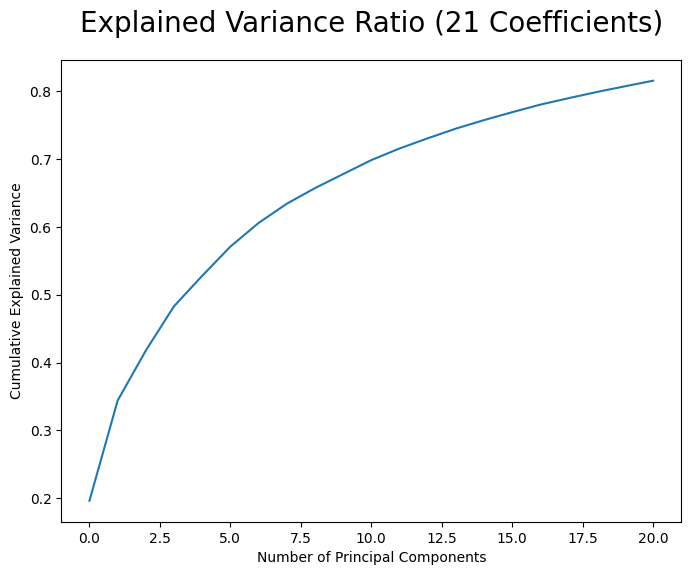

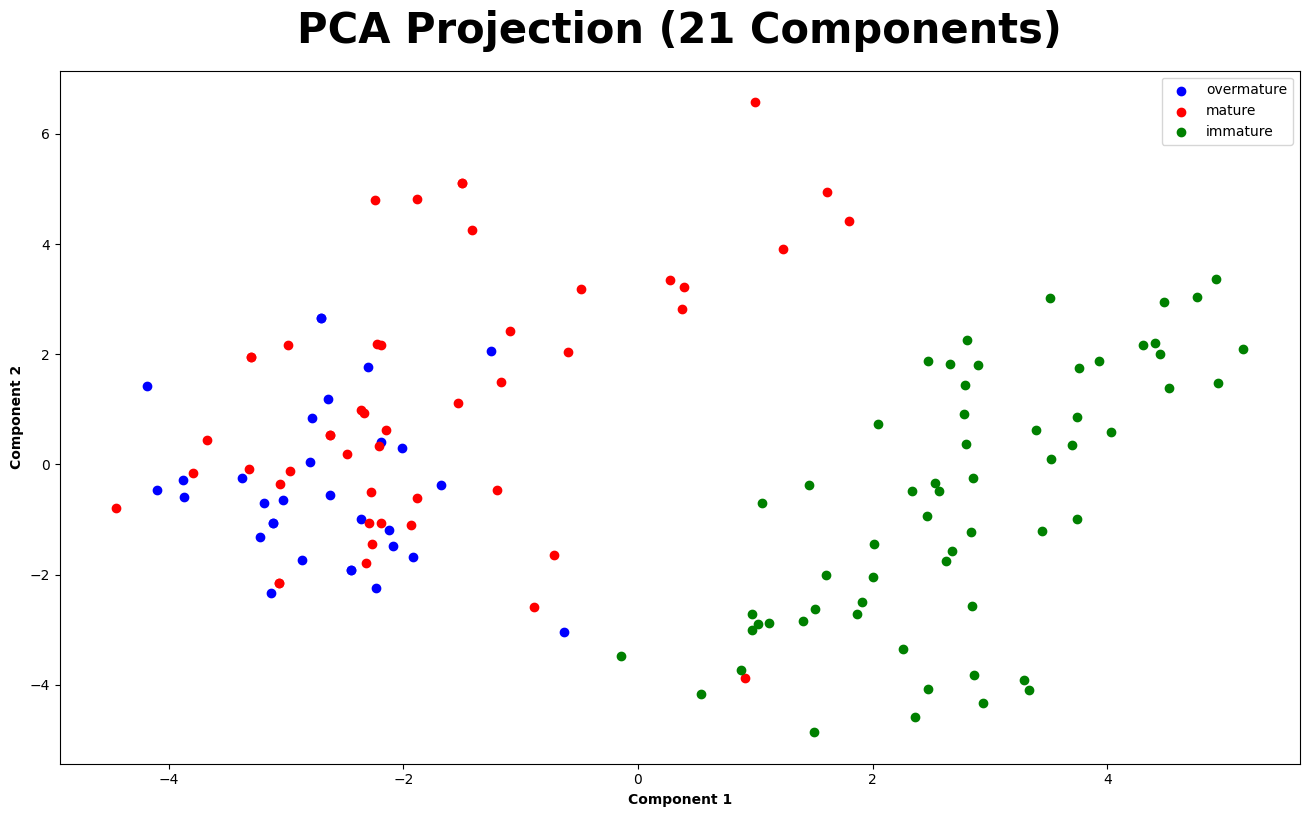

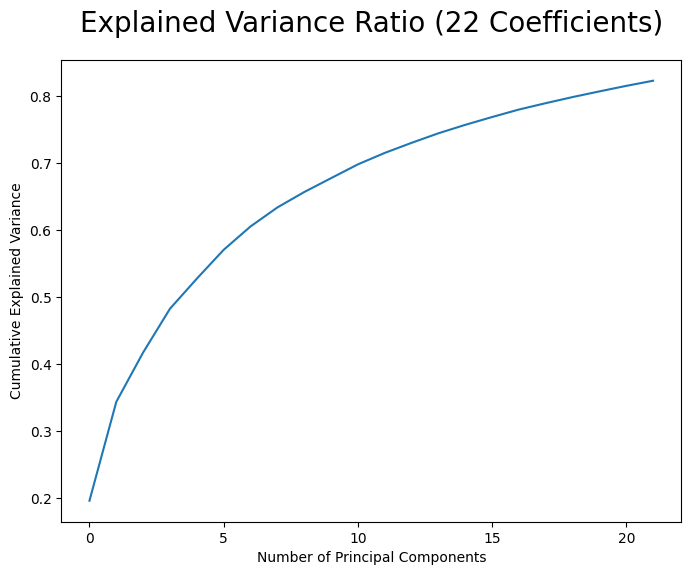

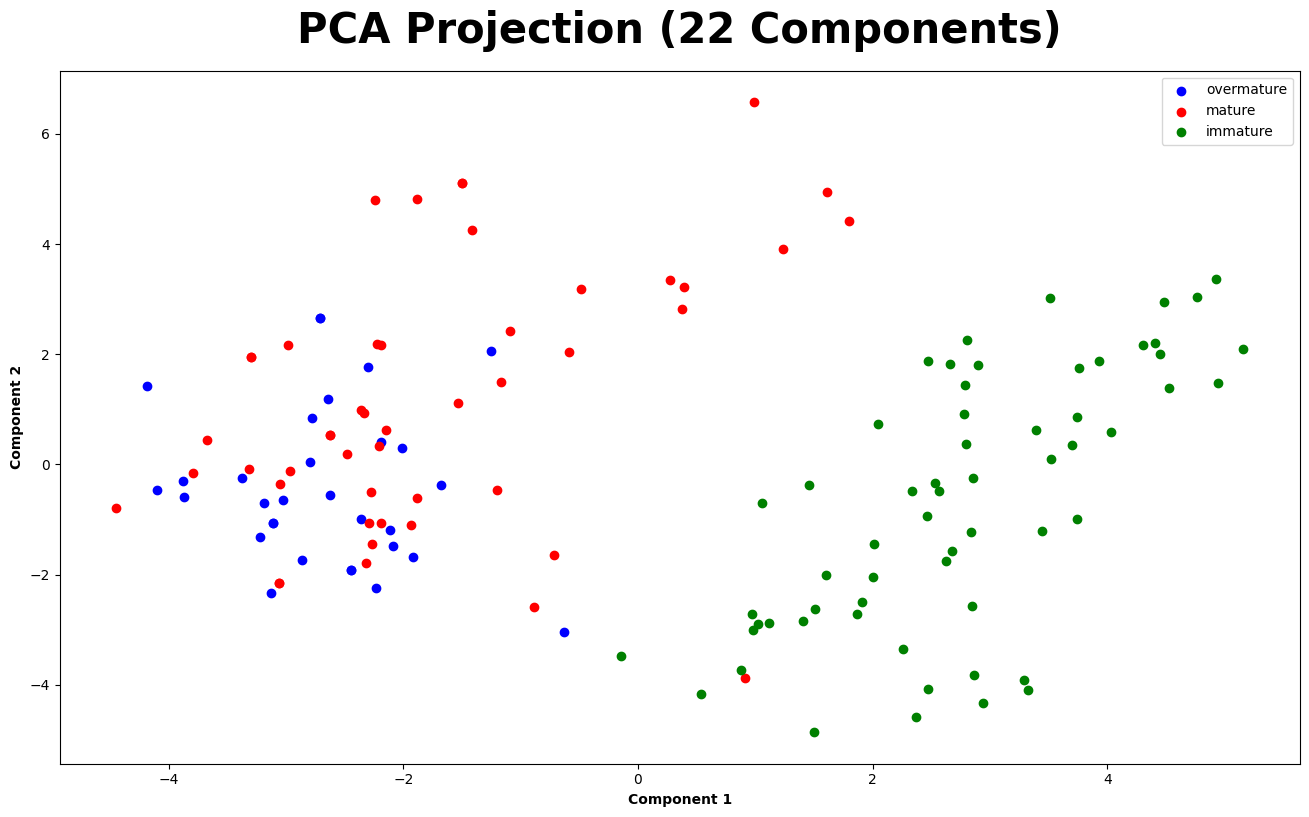

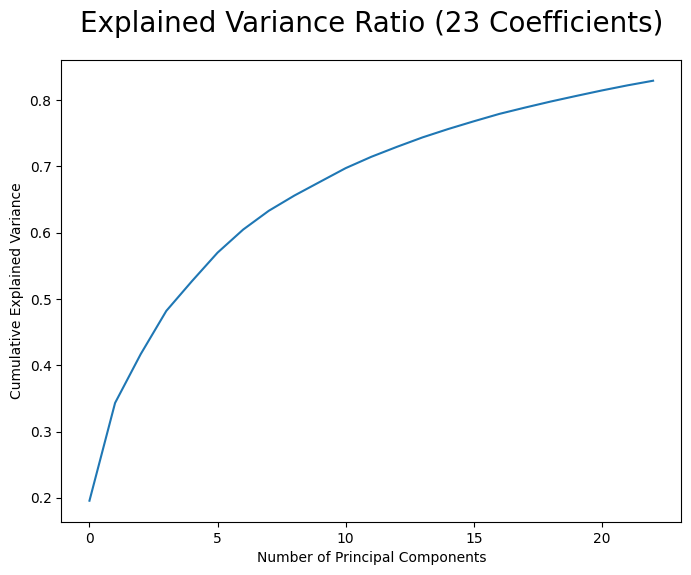

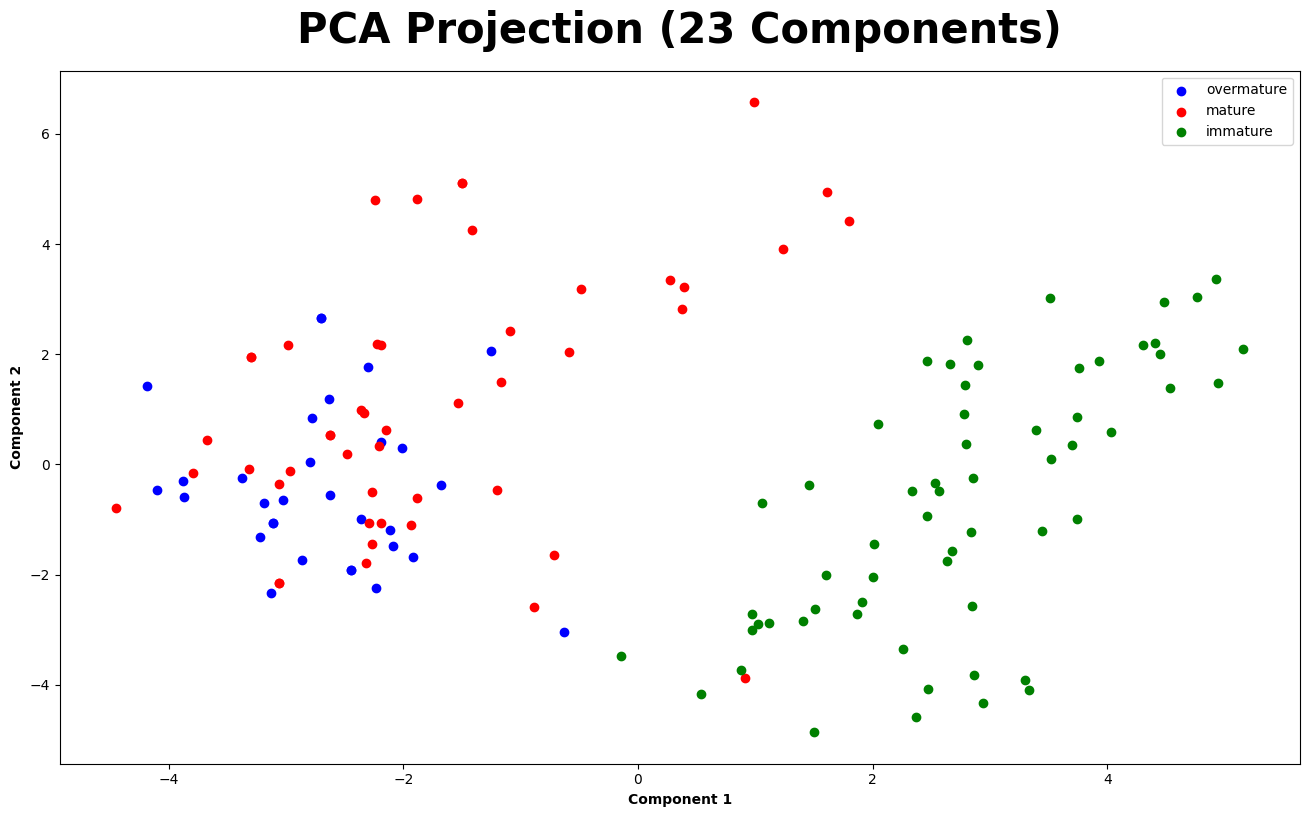

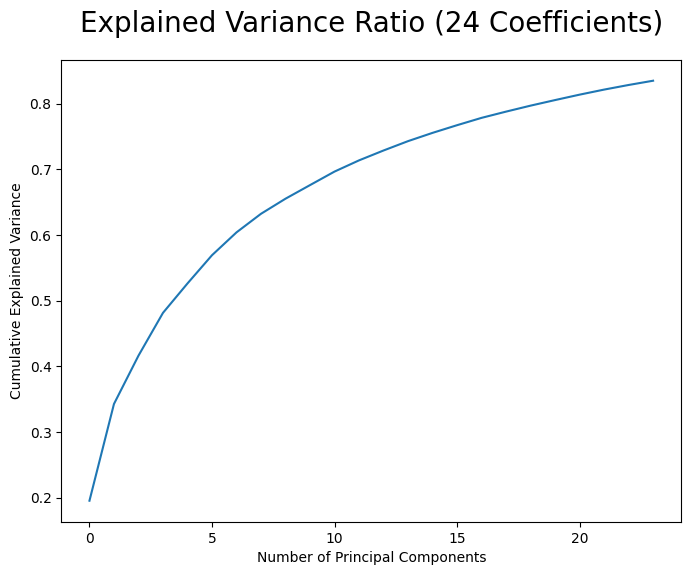

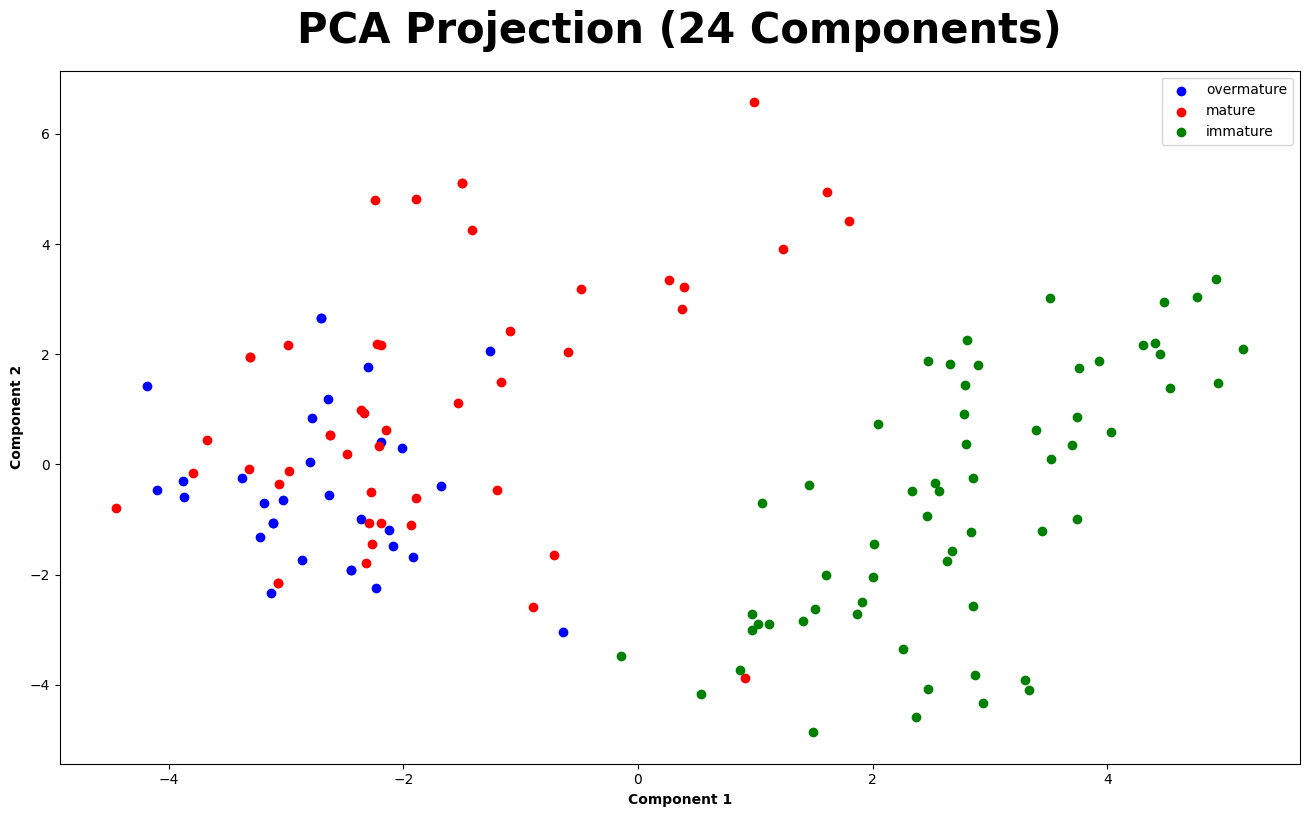

In [11]:
df = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')

for coeff in range(21, 40):
    pnccs = []
    vector_size = []

    for filename in df['full_path'].values:
        wavSig, sampRate = librosa.load(filename)
        result = pncc(wavSig, fs=sampRate, num_ceps=coeff)
        pnccs.append(result)
        vector_size.append(result.shape)

    df_pncc = df.copy()
    df_pncc['feature_array'] = pnccs
    df_pncc['feature_array_size'] = vector_size
    df_pncc.to_csv(f'./extracted-data/coconut-maturity-wav-extracted-{coeff}-coeff.csv')
    df_pncc_cut = df_pncc[df_pncc['feature_array'].apply(lambda x: not np.isnan(x).any())]
    df_pncc_cut.to_csv(f'./extracted-data/coconut-maturity-wav-extracted-{coeff}-coeff-cleaned.csv')
    df_pncc_cut.reset_index(drop=True, inplace=True)

    stacked_data = np.stack(df_pncc_cut['feature_array'].values)
    data_reshaped = np.reshape(stacked_data, (stacked_data.shape[0], stacked_data.shape[1] * stacked_data.shape[2]))

    pca = PCA(n_components=coeff)
    pca.fit(data_reshaped)
    pca_result = pca.transform(data_reshaped)

    fig, ax = plt.subplots(figsize = (8, 6))
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Explained Variance Ratio ({coeff} Coefficients)', fontsize=20, pad=20)
    fig.savefig(f'./output/variance/variance-plot-{coeff}.png')

    labels = df_pncc_cut['class_name'].values.tolist()
    label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

    x = pca_result[:, 0]
    y = pca_result[:, 1]

    unique_labels = set(labels)

    fig, ax = plt.subplots(figsize=(16, 9))
    for label in unique_labels:
        indices = np.where(np.array(labels) == label)
        ax.scatter(x[indices], y[indices], c=label_colors[label], label=label)

    plt.title(f'PCA Projection ({coeff} Components)', fontsize=30, pad=20, fontweight='bold')
    plt.xlabel('Component 1', fontweight='bold')
    plt.ylabel('Component 2', fontweight='bold')
    ax.legend()
    fig.savefig(f'./output/pca-plot/pca-plot-{coeff}.png')




In [12]:
coeff

25